<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 <br>
<font color=3C99D size=5>
Diagonalization, Eigenvectors and Decomposition <br>
<font color=696880 size=4>
<!-- <br> -->
Mahdi Alinejad - Mahan Bayhaghi

____


<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Student Information</h3>

In [1]:
student_number = '401105989'
first_name = 'Amirhosein'
last_name = 'Rezaei'

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [2]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [3]:
def compute_eigenvalues(A):
    coefficients = np.poly(A)
    eigenvalues = np.roots(coefficients)
    return eigenvalues.tolist()

def compute_eigenvector(A, eigenvalue):
    n = A.shape[0]
    I = np.eye(n)
    B = A - eigenvalue * I
    if B[0, 0] == 0 and B[0, 1] == 0:
       eigenvector = np.array([B[1, 1], -B[1, 0]])

    else:
       eigenvector = np.array([-B[0, 1], B[0, 0]])
    norm_2 = np.sqrt(np.sum(eigenvector**2))
    Normalized_eigenvector = eigenvector / norm_2
    return Normalized_eigenvector

def compute_eigenvectors(A):
    eigenvalues = compute_eigenvalues(A)
    eigenvectors = [compute_eigenvector(A, eigenvalue) for eigenvalue in eigenvalues]
    return np.column_stack(eigenvectors)


<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [4]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

### no need to change the below cells

In [5]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

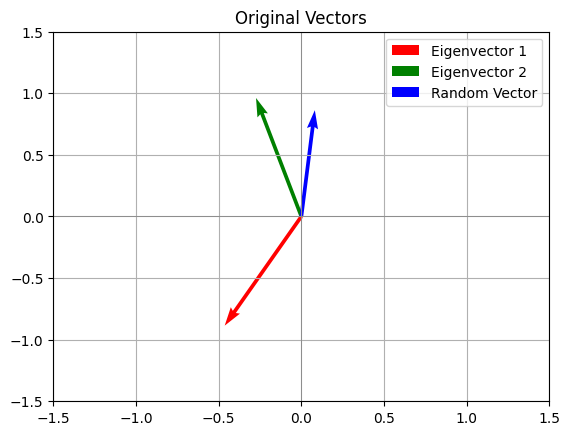

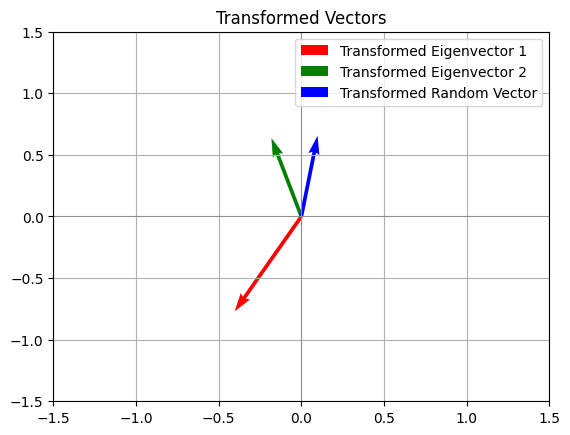

In [7]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[:, 0], eigenvectors[:, 1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[:, 0], A @ eigenvectors[:, 1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>

# A random vector does not have this property. When a random vector is transformed by a matrix, its direction typically changes due to the influence of all components of the transformation matrix A, which can rotate, stretch, or otherwise alter the direction of the vector.

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [8]:
def diagonalize(A):
    eigenvalues = compute_eigenvalues(A)
    P = compute_eigenvectors(A)
    D = np.diag(eigenvalues)
    try:
        P_inv = np.linalg.inv(P)
    except np.linalg.LinAlgError:
        raise ValueError("Matrix A is not diagonalizable")
    if not np.allclose(A, P @ D @ P_inv):
        raise ValueError("Matrix A is not diagonalizable")

    return D


to check your answer use the cells below

In [9]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [10]:
A = generate_valid_matrix()

D = diagonalize(A)

check_diagonalization(D, A)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

The diagonalization of matrix
𝐴
A, then calculating powers of
𝐴
A is simplified to
𝐴
𝑛
=
𝑃
𝐷
𝑛
𝑃
−
1
A
n
 =PD
n
 P
−1
 . This reduces the computational effort to calculating
𝐷
𝑛
D
n
 , which is straightforward because
𝐷
D is diagonal.

<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [11]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [12]:
n_values = range(1, 200)

In [13]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [15]:
def compute_powers_your_way(A, n):
    eigenvalues = compute_eigenvalues(A)
    P = compute_eigenvectors(A)
    D = np.diag(eigenvalues)
    D_n = np.diag(eigenvalues)**n
    try:
        P_inv = np.linalg.inv(P)
    except np.linalg.LinAlgError:
        raise ValueError("Matrix A is not diagonalizable")
    result = P @ D_n @ P_inv

    return result

In [16]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

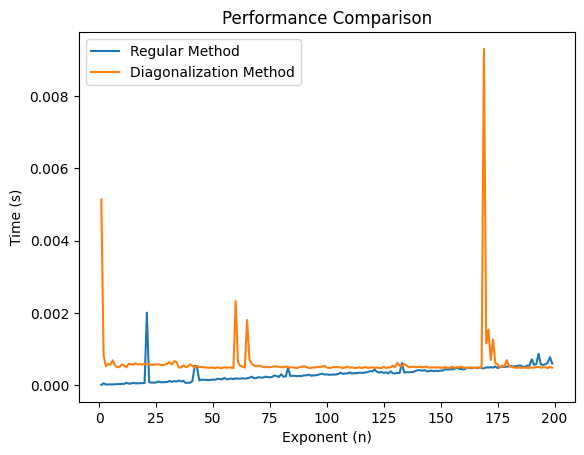

In [38]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**In the section below, implement QR decompostion step by step :**

In [26]:
def gram_schmidt(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    R = np.zeros((m, m))
    for i in range(m):
        Q[:, i] = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            Q[:, i] -= R[j, i] * Q[:, j]
        R[i, i] = np.sqrt(np.sum(Q[:, i] ** 2))
        Q[:, i] /= R[i, i]
    return Q, R

Now, let's check if the decompostion. No need to change the following cell.

In [27]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    Q, R = gram_schmidt(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.3853744  0.1365909  0.0142895  0.34119104]
 [0.60653098 0.57320218 0.5933048  0.90424132]
 [0.44719947 0.79963917 0.0136466  0.09224378]
 [0.50284355 0.87468474 0.9989103  0.0465725 ]]

Orthogonal matrix Q:
[[ 0.39144336 -0.65168541 -0.21496677 -0.61308034]
 [ 0.61608276 -0.33831819  0.20415892  0.68139707]
 [ 0.45424207  0.47395853 -0.75267113  0.05013612]
 [ 0.51076244  0.48601466  0.58787294 -0.39663193]]

Upper triangular matrix R:
[[ 0.98449594  1.21659344  0.88752311  0.75633295]
 [ 0.          0.52116639  0.2819149  -0.46191586]
 [ 0.          0.          0.69501763  0.06921368]
 [ 0.          0.          0.          0.39312247]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [28]:
def householder_reflection(a):
    v = a.copy()
    norm_a = np.sqrt(np.sum(a**2))
    sign = 1 if a[0] >= 0 else -1
    v[0] += sign * norm_a
    norm_v = np.sqrt(np.sum(v**2))
    v = v / norm_v
    H = np.eye(len(a)) - 2 * np.outer(v, v)
    return H

def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    for i in range(min(m, n)):
        H_i = np.eye(m)
        H_i[i:, i:] = householder_reflection(R[i:, i])
        R = H_i @ R
        Q = Q @ H_i.T
    return Q, R


Now, let's check if the decompostion.


In [29]:
test_QR_decomposition()

Matrix A:
[[0.15693081 0.01434726 0.83513811 0.89910302]
 [0.46367072 0.70821804 0.29843858 0.48552143]
 [0.69765333 0.66562703 0.81421586 0.70080075]
 [0.98631819 0.37052665 0.68375734 0.57085162]]

Orthogonal matrix Q:
[[ 0.12039013 -0.17250973  0.91444342  0.34574534]
 [ 0.35570693  0.72762293 -0.12614459  0.57282196]
 [ 0.53520768  0.35151171  0.26801498 -0.71983347]
 [ 0.75665814 -0.56324488 -0.27576936  0.18486464]]

Upper triangular matrix R:
[[ 1.30351891  0.89025603  1.15984419  1.08795994]
 [ 0.          0.5381191  -0.0258351   0.12298293]
 [ 0.          0.          0.75570286  0.79133465]
 [ 0.          0.          0.          0.19004846]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [35]:
def qr_algorithm(A, num_iterations=100000, tol=1e-10):
    A = A.copy()
    n = A.shape[0]
    Q_total = np.eye(n)
    for _ in range(num_iterations):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)
        Q_total = np.dot(Q_total, Q)
        off_diag = np.sum(np.abs(A - np.diag(np.diag(A))))
        if off_diag < tol:
            break
    eigenvalues = np.diag(A)
    return eigenvalues, Q_total

def qr_decomposition(A):
    n = A.shape[0]
    Q = np.eye(n)
    R = A.copy()
    for i in range(n - 1):
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.sign(x[0]) * np.sqrt(np.dot(x, x))
        v = (x - e) / np.sqrt(np.dot(x - e, x - e))
        Q_i = np.eye(n)
        Q_i[i:, i:] -= 2.0 * np.outer(v, v)
        R = np.dot(Q_i, R)
        Q = np.dot(Q, Q_i.T)
    return Q, R

def compute_eigenvectors(A, eigenvalues, num_iterations=1000, tol=1e-8):
    n = A.shape[0]
    eigenvectors = []
    for i in range(n):
        eigenvector = np.random.rand(n)
        eigenvector /= np.sqrt(np.dot(eigenvector, eigenvector))
        for _ in range(num_iterations):
            Av = np.dot(A, eigenvector)
            eigenvector_new = Av / np.sqrt(np.dot(Av, Av))
            if np.sum(np.abs(eigenvector - eigenvector_new)) < tol:
                break
            eigenvector = eigenvector_new
        eigenvectors.append(eigenvector)
    return np.array(eigenvectors).T

Let's verify our results. no need to change the following cell.

In [37]:
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)

    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)

    # Verify the results
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, eigenvectors @ np.diag(eigenvalues)))

    # Compare with NumPy's eig function
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real

    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)

    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)

    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(np_eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.91078467 0.1829801  0.75539363 0.16673958]
 [0.83734461 0.27790419 0.98419526 0.059178  ]
 [0.28583752 0.61305744 0.40724495 0.32877145]
 [0.49766371 0.2241053  0.82963964 0.66668194]]

Eigenvalues (QR Algorithm):
[ 1.93625962  0.47056792 -0.40313306  0.25892127]

Eigenvectors (QR Algorithm):
[[ 0.4927101  -0.1425807   0.26873766 -0.52808068]
 [ 0.5179916  -0.4164584   0.62743905  0.43036924]
 [ 0.42000147 -0.01420127 -0.67905502  0.47450447]
 [ 0.55903508  0.89779255  0.27015658 -0.55745728]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 1.93625962 -0.40313306  0.25892127  0.47056792]

Eigenvectors (NumPy):
[[-0.4927101   0.26873766 -0.52808068 -0.1425807 ]
 [-0.5179916   0.62743905  0.43036924 -0.4164584 ]
 [-0.42000147 -0.67905502  0.47450447 -0.01420127]
 [-0.55903508  0.27015658 -0.55745728  0.89779255]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
